# Battle of Neighbourhoods - Week 2

# 1. Introduction

## 1.1 Background

## 1.2 Problem

## 1.3 Interest

# 2. Data acquisition and cleaning

## 2.1 Data sources

1. We're scrapping the site <a href="https://www.point2homes.com/CA/Real-Estate-Listings/ON/Toronto.html?location=Toronto%2C+ON&search_mode=location&page=3&SelectedView=listings&LocationGeoId=783094&location_changed=&ajax=1">point2homes.com on Toronto</a> to predict house sales on Toronto Neighbourhoods.
2. Using  <a href='http://data.torontopolice.on.ca/datasets/mci-2014-to-2018'> The MCI  dataset includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences </a>  to predict crime on Toronto Neighbourhoods.
3. We will be completely working on <a href='https://developer.foursquare.com/'>Foursquare data</a> to explore and try to locate our new house where more venues like church, restaurant, bar, hotel museums, memorials etc.. that are present nearby.

In [ ]:
!pip install numpy


### 2.1.1 Importing Libraries and Data Collections

In [47]:
import warnings
warnings.filterwarnings('ignore') 
#import requests # HTTP library
import pandas as pd # for data analysis
import numpy as np  # data in a vectorized manner manipulation
# Matplotlib and associated plotting modules for visualization
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import shapely

import statsmodels.api as sm # implement statistic models
import time # use time
from geopy.geocoders import Nominatim  # for geocoders referencing
import geopandas as gpd # for spatial dataset
import seaborn as sns # for plotting and visulalization
from scipy import stats # statistic computation
from bs4 import BeautifulSoup # scrapping web site
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import re # regualr expression
import requests

In [48]:
# using user to querying the site web
user_agent = ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36 Edg/80.0.100.0','Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36','Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:70.0) Gecko/20100101 Firefox/70.0','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.87 Safari/537.36 Edg/80.0.100.0','Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0)']
print(len(user_agent))


5


 We're scrapping the site <a href="https://www.point2homes.com/CA/Real-Estate-Listings/ON/Toronto.html?location=Toronto%2C+ON&search_mode=location&page=3&SelectedView=listings&LocationGeoId=783094&location_changed=&ajax=1">point2homes.com on Toronto</a> to predict house sales on Toronto Neighbourhoods.

In [49]:
## scrapping www.point2homes.com to retreivpage) []
lat_list = []
long_list = []
address_list = []
price_list= []
data_url_list = []
bed_list = []
bath_list = []
bath_list = []
sqft_list = []
type_list = []
# iterates in 148 pages
for index in range(1,148):
    url = 'https://www.point2homes.com/CA/Real-Estate-Listings/ON/Toronto.html?location=Toronto%2C+ON&search_mode=location&page={}&SelectedView=listings&LocationGeoId=783094&location_changed=&ajax=1'.format(index)
    val = index%5
    headers={'User-Agent':user_agent[val]} 
    page = requests.get(url,headers=headers)
    soup = BeautifulSoup(page.content,'html.parser')
    time.sleep(3)
    articles = soup.find_all('article')
    if  articles != None :        
        for article in articles:
            bed = article.find(class_ = 'ic-beds')
            if bed != None:
                bed_list.append(bed.get_text().replace('\n','').strip())
            else:
                bed_list.append('--')
            bath = article.find(class_ = 'ic-baths')
            if bath != None:
                bath_list.append(bath.get_text().replace('\n','').strip())
            else:
                bath_list.append('--')

            sqft = article.find(class_ = 'ic-sqft')
            if sqft != None:
                sqft_list.append(sqft.get_text().replace('\n','').strip())
            else:
                sqft_list.append('--')

            typ = article.find(class_ = 'ic-proptype')
            if typ != None:
                type_list.append(typ.get_text().replace('\n','').strip())
            else:
                type_list.append('--')

            price = article.find(class_ ='price')

            if price != None:
                price_list.append(price['data-price'])
            else:
                price_list.append('--')

            address = article.find(class_ ='item-address')
            if address != None:
                data_url_list.append(address['data-url'])
            else:
                price_list.append('--')

            inputs = article.find_all('input')
            if len(inputs) == 3:
                address_list.append(inputs[0]['value'])
                long_list.append(inputs[2]['value'])
                lat_list.append(inputs[1]['value'])
            elif len(inputs) == 2  :
                if 'ShortAddress' in inputs[0]['id']:
                    address_list.append(inputs[0]['value'])
                    long_list.append(0)
                    lat_list.append(0)
                elif 'ShortAddress' in inputs[1]['id']:
                    address_list.append(inputs[1]['value'])
                    long_list.append(0)
                    lat_list.append(0)
                else:
                    address_list.append('--')
                    long_list.append(0)
                    lat_list.append(0)
            elif len(inputs) == 1  :
                if 'ShortAddress' in inputs[0]['id']:
                    address_list.append(inputs[0]['value'])
                    long_list.append(0)
                    lat_list.append(0)
                else :
                    address_list.append('--')
                    long_list.append(0)
                    lat_list.append(0)
            elif len(inputs) == 0:
                address_list.append('--')
                long_list.append(0)
                lat_list.append(0)
        print(index)

ConnectionError: HTTPSConnectionPool(host='www.point2homes.com', port=443): Max retries exceeded with url: /CA/Real-Estate-Listings/ON/Toronto.html?location=Toronto%2C+ON&search_mode=location&page=1&SelectedView=listings&LocationGeoId=783094&location_changed=&ajax=1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa4491c5048>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [50]:
# use dictionary before use dataframe
data_dict = dict()
data_dict['address'] = address_list
data_dict['long'] = long_list
data_dict['lat'] = lat_list
data_dict['data_url'] = data_url_list
data_dict['price_$CAN'] = price_list
data_dict['beds'] = bed_list
data_dict['baths'] =bath_list
data_dict['sqft'] = sqft_list
data_dict['type'] = type_list
# convert dictionary to  dataframe
house_data = pd.DataFrame(data_dict)
# save dataframe as csv file
house_data.to_csv('./dataset/house_data2.csv')

In [51]:
# use the dataframe
house_data = pd.read_csv('./dataset/house_data.csv')
print(house_data.shape)
house_data.head(10)

(3525, 10)


,Unnamed: 0,address,long,lat,data_url,price_$CAN,beds,baths,sqft,type
0,0,"33 Shore Breeze Dr, Toronto, Ontario",-79.478979,43.623426,/CA/Condo-For-Sale/ON/Toronto/Humber-Bay/33-Sh...,"$649,000 CAD",1 Bed,1 Bath,699 Sqft,Condo
1,1,"1151 Markham Rd., Toronto, Ontario",-79.231107,43.776168,/CA/Condo-For-Sale/ON/Toronto/Curran-Hall/1151...,"$542,990 CAD",1 Bed,1 Bath,678 Sqft,Condo
2,2,"Liberty Market Tower, Toronto, Ontario",-79.417796,43.638325,/CA/Condo-For-Sale/ON/Toronto/King-West-Villag...,"$600,000 CAD",--,--,--,Condo
3,3,"51 East Liberty St, Toronto, Ontario",-79.412811,43.638563,/CA/Condo-For-Sale/ON/Toronto/King-West-Villag...,"$499,000 CAD",1 Bed,1 Bath,--,Condo
4,4,"7 Bishop Ave, Toronto, Ontario",-79.414311,43.781737,/CA/Condo-For-Sale/ON/Toronto/Newtonbrook/7-Bi...,"$637,000 CAD",2 Beds,1 Bath,1399 Sqft,Condo
5,5,"Central Etobicoke, Toronto, Ontario",-79.560200,43.660900,/CA/Home-For-Sale/ON/Toronto/West-Deane-Park/C...,"$1,150,000 CAD",3 Beds,2 Baths,--,Residential
6,6,"Lake & Town Urban Townhomes, Etobicoke, Ontario",-79.565600,43.643600,/CA/Home-For-Sale/ON/Toronto/Bloordale-West-Ma...,"$625,000 CAD",2 Beds,2 Baths,900 Sqft,Townhouse
7,7,"36 Park Lawn Rd, Toronto, Ontario",-79.484151,43.623604,/CA/Condo-For-Sale/ON/Toronto/Mimico/36-Park-L...,"$539,000 CAD",1 Bed,1 Bath,599 Sqft,Condo
8,8,"102 Resurrection Road, Toronto, Ontario",-79.384900,43.652900,/CA/Home-For-Sale/ON/Toronto/Islington-Village...,"$799,000 CAD",2 Beds,1 Bath,--,Townhouse
9,9,"Sky Tower One Yonge Condos - 11 Yonge Street, ...",-79.384900,43.652900,/CA/Home-For-Sale/ON/Toronto/Bay-Street-Corrid...,"$769,900 CAD",1 Bed,1 Bath,550 Sqft,Apartment


Use <a href='http://data.torontopolice.on.ca/datasets/mci-2014-to-2018'> The MCI  dataset includes all Major Crime Indicators (MCI) 2014 to 2018 occurrences by reported date and related offences </a>  to predict crime on Toronto Neighbourhoods.

In [52]:
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
print(mci_2014_2018.shape)
mci_2014_2018.head(10)

(167525, 29)


,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,2014,June,20,171,Friday,13,2014.0,June,20.0,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,2014,July,2,183,Wednesday,5,2014.0,July,2.0,183.0,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,2014,July,2,183,Wednesday,20,2014.0,July,2.0,183.0,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005
5,-79.273819,43.709972,2355,GO-20142524077,2014-07-18T00:01:00.000Z,2014-07-18T17:36:00.000Z,House,2120,200,B&E,2014,July,18,199,Friday,17,2014.0,July,18.0,199.0,Friday,0,Break and Enter,D41,120,Clairlea-Birchmount (120),43.709972,-79.273819,2006
6,-79.466019,43.709179,2356,GO-20142526048,2014-07-18T23:15:00.000Z,2014-07-18T23:15:00.000Z,House,1430,100,Assault,2014,July,18,199,Friday,23,2014.0,July,18.0,199.0,Friday,23,Assault,D13,31,Yorkdale-Glen Park (31),43.709179,-79.466019,2007
7,-79.386063,43.655243,2357,GO-20142528713,2014-07-19T01:30:00.000Z,2014-07-19T11:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,19,200,Saturday,11,2014.0,July,19.0,200.0,Saturday,1,Robbery,D52,76,Bay Street Corridor (76),43.655243,-79.386063,2008
8,-79.237824,43.791515,2358,GO-20142531700,2014-07-19T15:00:00.000Z,2014-07-19T22:11:00.000Z,House,2120,220,B&E W'Intent,2014,July,19,200,Saturday,22,2014.0,July,19.0,200.0,Saturday,15,Break and Enter,D42,132,Malvern (132),43.791515,-79.237824,2009
9,-79.435112,43.717243,2359,GO-20142536209,2014-07-20T01:30:00.000Z,2014-07-20T16:33:00.000Z,Other,2120,220,B&E W'Intent,2014,July,20,201,Sunday,16,2014.0,July,20.0,201.0,Sunday,1,Break and Enter,D13,32,Englemount-Lawrence (32),43.717243,-79.435112,2010


3. We will be completely working on <a href='https://developer.foursquare.com/'>Foursquare data</a> to explore and try to locate our new house where more venues like church, restaurant, bar, hotel museums, memorials etc.. that are present nearby.

In [53]:
CLIENT_ID = 'XXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXX' # your Foursquare Secret
VERSION = '20191028'
LIMIT = 150

latitude = house_data.head(1).lat.values[0]  
longitude =house_data.head(1).long.values [0]
toronto='Toronto location : {},{}'.format(latitude,longitude)
print(toronto)

Toronto location : 43.623426,-79.47897900000001


In [54]:
#Quering for hotel & restaurant

search_query = 'hotel'
search_query_res = 'restaurant'

radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url_restaurant = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query_res, radius, LIMIT)
#url

In [55]:
results_hotel = requests.get(url_hotel).json()
results_restaurant = requests.get(url_restaurant).json()


ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/search?client_id=XXXXXXX&client_secret=XXXXXXX&ll=43.623426,-79.47897900000001&v=20191028&query=hotel&radius=1000&limit=150 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa449545550>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [56]:
results_hotel

NameError: name 'results_hotel' is not defined

In [57]:
results_restaurant

NameError: name 'results_restaurant' is not defined

## 2.2 Data cleaning

### 2.2.1  Data cleaning for house_data dataset

In [283]:
# use house_data csv fine
house_data = pd.read_csv('./dataset/house_data.csv')
print(house_data.shape)
house_data.drop_duplicates(keep=False,inplace=True) 
house_data['neighborhood'] = np.nan
for i in range(0,house_data.shape[0]):
    house_data.loc[i,'neighborhood']= house_data.loc[i,'data_url'].split('/')[5]

# remove  text in columns ['beds','baths','sqft',''price_$CAN]
house_data.beds = house_data.beds.apply(lambda x: re.sub('\D','',x))

house_data.baths = house_data.baths.apply(lambda x: re.sub('\D','',x))
house_data['price_$CAN'] = house_data['price_$CAN'].apply(lambda x: re.sub('\D','',x) )

house_data.sqft = house_data.sqft.apply(lambda x: re.sub('\D','',x))
 
#rename the price_$CAN to price_dallar_can
house_data.rename(columns ={'price_$CAN':'price_100K'},inplace =True)

# remove (-) in neignborhood columns
house_data.neighborhood = house_data.neighborhood.str.replace('-',' ')


# drop columns ['data_url','Unnamed: 0']
house_data.drop(columns =['data_url','Unnamed: 0'],axis=1,inplace =True)
#remove duplicate values
house_data.drop_duplicates(keep=False,inplace=True) 
house_data.info()

(3525, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 24 to 716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       641 non-null    object 
 1   long          641 non-null    float64
 2   lat           641 non-null    float64
 3   price_100K    641 non-null    object 
 4   beds          641 non-null    object 
 5   baths         641 non-null    object 
 6   sqft          641 non-null    object 
 7   type          641 non-null    object 
 8   neighborhood  641 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.1+ KB


In [284]:
# deletes all the missing values in the house_data
house_data =house_data[(house_data['beds']!= '') & (house_data['baths']!='') & (house_data['sqft']!='')]

# converts to numeric values columns ['sqft','beds','baths','price_100K']
house_data[['sqft']] = pd.to_numeric(house_data['sqft'], errors='coerce')
house_data[['beds']] = pd.to_numeric(house_data['beds'], errors='coerce')
house_data[['baths']] = pd.to_numeric(house_data['baths'], errors='coerce')
house_data[['price_100K']] = pd.to_numeric(house_data['price_100K'], errors='coerce')

# convert price in 100K $ CAN
house_data['price_100K'] = np.round(house_data['price_100K']/100000.0,2)
# get a log of sqft_log
house_data['sqft_log'] = np.round(np.log(house_data['sqft']),2)
house_data.head(10)


,address,long,lat,price_100K,beds,baths,sqft,type,neighborhood,sqft_log
24,"215 Fort York Blvd, Toronto, Ontario",-79.404867,43.636608,8.39,2,2,820,Condo,Fort York,6.71
30,"92 King St E, Toronto, Ontario",-79.374950,43.650055,6.00,2,1,720,Condo,Old Town,6.58
34,"50 Lynn Williams St, Toronto, Ontario",-79.415185,43.639644,5.00,1,1,675,Residential,King West Village,6.51
44,"31 Jane Osler Blvd, Toronto, Ontario",-79.459742,43.723895,21.90,5,4,3000,Residential,Downsview,8.01
71,"30 Ordnance St, Toronto, Ontario",-79.409769,43.639732,5.50,1,1,600,Residential,Fort York,6.40
76,"8 the Esplanade ave, Toronto, Ontario",-79.376349,43.646236,6.25,1,1,602,Condo,Downtown Toronto,6.40
84,"19 Singer Crt, Toronto, Ontario",-79.369645,43.769466,4.86,1,1,540,Apartment,Bayview Village,6.29
124,"91 Bobmar Road , Toronto, Ontario",-79.179102,43.787803,7.75,4,2,1950,Residential,Highland Creek,7.58
320,"155 Yorkville Ave, Toronto, Ontario",-79.394354,43.670266,12.89,2,2,1199,Residential,Yorkville,7.09
326,"2152 Lawrence Ave, Toronto, Ontario",-79.285863,43.747920,4.99,2,2,900,Condo,Wexford,6.80


In [285]:
# improve categorical values to numerics values function
def get_dummies(dataset,columns):
    for column_ in columns:
        data = pd.get_dummies(dataset[column_])
        for column in data.columns:
            dataset[column] = data[column]
    print(dataset.shape)
    return dataset
        

In [286]:
# improves categorical values to numerics values function for house_data
house_data = get_dummies(house_data,columns =['type'])
house_data.head(3)

(111, 13)


,address,long,lat,price_100K,beds,baths,sqft,type,neighborhood,sqft_log,Apartment,Condo,Residential
24,"215 Fort York Blvd, Toronto, Ontario",-79.404867,43.636608,8.39,2,2,820,Condo,Fort York,6.71,0,1,0
30,"92 King St E, Toronto, Ontario",-79.374950,43.650055,6.00,2,1,720,Condo,Old Town,6.58,0,1,0
34,"50 Lynn Williams St, Toronto, Ontario",-79.415185,43.639644,5.00,1,1,675,Residential,King West Village,6.51,0,0,1


In [287]:
neighbourdhood = house_data.groupby(['neighborhood']).size().to_frame()
neighbourdhood.reset_index(inplace = True)
neighbourdhood.rename(columns ={0:'Total houses'},inplace= True)
sorted_values = neighbourdhood.sort_values(by =['Total houses'],ascending = False)
sorted_values  = sorted_values[sorted_values['Total houses'] == 1]
neighborhood_list = sorted_values.neighborhood.values


In [288]:
for index in house_data.index:
    if house_data.at[index,'neighborhood'] in neighborhood_list:
        house_data.at[index,'neighborhood']  = 'Other'


In [289]:
house_data ['house_number'] = '--'
house_data.head()

,address,long,lat,price_100K,beds,baths,sqft,type,neighborhood,sqft_log,Apartment,Condo,Residential,house_number
24,"215 Fort York Blvd, Toronto, Ontario",-79.404867,43.636608,8.39,2,2,820,Condo,Fort York,6.71,0,1,0,--
30,"92 King St E, Toronto, Ontario",-79.374950,43.650055,6.00,2,1,720,Condo,Old Town,6.58,0,1,0,--
34,"50 Lynn Williams St, Toronto, Ontario",-79.415185,43.639644,5.00,1,1,675,Residential,King West Village,6.51,0,0,1,--
44,"31 Jane Osler Blvd, Toronto, Ontario",-79.459742,43.723895,21.90,5,4,3000,Residential,Downsview,8.01,0,0,1,--
71,"30 Ordnance St, Toronto, Ontario",-79.409769,43.639732,5.50,1,1,600,Residential,Fort York,6.40,0,0,1,--


In [290]:
for index in house_data.index:
    if house_data.at[index,'neighborhood'] == 'Other':
        house_data.at[index,'house_number'] = 'One'
    else:
        house_data.at[index,'house_number']  = 'More than one'


In [291]:
#type_df =pd.get_dummies(house_data.neighborhood)
#for columns in type_df.columns:
#    house_data[columns] = type_df[columns]
    
type_df =pd.get_dummies(house_data['house_number'])
for columns in type_df.columns:
    house_data[columns] = type_df[columns]
house_data.head(5)

,address,long,lat,price_100K,beds,baths,sqft,type,neighborhood,sqft_log,Apartment,Condo,Residential,house_number,More than one,One
24,"215 Fort York Blvd, Toronto, Ontario",-79.404867,43.636608,8.39,2,2,820,Condo,Fort York,6.71,0,1,0,More than one,1,0
30,"92 King St E, Toronto, Ontario",-79.374950,43.650055,6.00,2,1,720,Condo,Old Town,6.58,0,1,0,More than one,1,0
34,"50 Lynn Williams St, Toronto, Ontario",-79.415185,43.639644,5.00,1,1,675,Residential,King West Village,6.51,0,0,1,More than one,1,0
44,"31 Jane Osler Blvd, Toronto, Ontario",-79.459742,43.723895,21.90,5,4,3000,Residential,Downsview,8.01,0,0,1,More than one,1,0
71,"30 Ordnance St, Toronto, Ontario",-79.409769,43.639732,5.50,1,1,600,Residential,Fort York,6.40,0,0,1,More than one,1,0


### 2.2.2 mci_2014_2018 Data cleaning

In [292]:
# use mci_2014_2018 dataset
mci_2014_2018 = pd.read_csv('./dataset/mci_2014_to_2018.csv')
print(mci_2014_2018.shape)

# clear the Neighbourhood columns
mci_2014_2018['Neighbourhood'] = mci_2014_2018.Neighbourhood.apply(lambda x: x.split('(')[0].replace('-',' '))

# Replace Neighbourhood to neighborhood
mci_2014_2018.rename(columns = {'Neighbourhood': 'neighborhood'},inplace =True)
mci_2014_2018.info()

(167525, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167525 entries, 0 to 167524
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    167525 non-null  float64
 1   Y                    167525 non-null  float64
 2   Index_               167525 non-null  int64  
 3   event_unique_id      167525 non-null  object 
 4   occurrencedate       167525 non-null  object 
 5   reporteddate         167525 non-null  object 
 6   premisetype          167525 non-null  object 
 7   ucr_code             167525 non-null  int64  
 8   ucr_ext              167525 non-null  int64  
 9   offence              167525 non-null  object 
 10  reportedyear         167525 non-null  int64  
 11  reportedmonth        167525 non-null  object 
 12  reportedday          167525 non-null  int64  
 13  reporteddayofyear    167525 non-null  int64  
 14  reporteddayofweek    167525 non-null  object 
 15  repo

In [293]:
# improve  ['MCI','occurrencedayofweek','occurrencehour']
mci_2014_2018 = get_dummies(mci_2014_2018,columns = ['MCI','occurrencedayofweek','occurrencehour'])
val = {'January': 1,'February': 2,'March': 3,'April':4,'May':5,'June': 6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
mci_2014_2018.replace({"occurrencemonth": val},inplace=True)
# drop duplicate 
mci_2014_2018.drop_duplicates(keep=False,inplace=True) 
mci_2014_2018.head(10)

(167525, 65)


,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,neighborhood,Lat,Long,ObjectId,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,2014,June,20,171,Friday,13,2014.0,6.0,20.0,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor,43.659229,-79.385193,2001,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,7.0,2.0,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West,43.777592,-79.425400,2002,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,7.0,2.0,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West,43.777592,-79.425400,2003,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,2014,July,2,183,Wednesday,5,2014.0,7.0,2.0,183.0,Wednesday,1,Break and Enter,D42,132,Malvern,43.801727,-79.210373,2004,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,2014,July,2,183,Wednesday,20,2014.0,7.0,2.0,183.0,Wednesday,20,Assault,D42,130,Milliken,43.835884,-79.254334,2005,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,-79.273819,43.709972,2355,GO-20142524077,2014-07-18T00:01:00.000Z,2014-07-18T17:36:00.000Z,House,2120,200,B&E,2014,July,18,199,Friday,17,2014.0,7.0,18.0,199.0,Friday,0,Break and Enter,D41,120,Clairlea Birchmount,43.709972,-79.273819,2006,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-79.466019,43.709179,2356,GO-20142526048,2014-07-18T23:15:00.000Z,2014-07-18T23:15:00.000Z,House,1430,100,Assault,2014,July,18,199,Friday,23,2014.0,7.0,18.0,199.0,Friday,23,Assault,D13,31,Yorkdale Glen Park,43.709179,-79.466019,2007,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,-79.386063,43.655243,2357,GO-20142528713,2014-07-19T01:30:00.000Z,2014-07-19T11:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,19,200,Saturday,11,2014.0,7.0,19.0,200.0,Saturday,1,Robbery,D52,76,Bay Street Corridor,43.655243,-79.386063,2008,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-79.237824,43.791515,2358,GO-20142531700,2014-07-19T15:00:00.000Z,2014-07-19T22:11:00.000Z,House,2120,220,B&E W'Intent,2014,July,19,200,Saturday,22,2014.0,7.0,19.0,200.0,Saturday,15,Break and Enter,D42,132,Malvern,43.791515,-79.237824,2009,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,-79.435112,43.717243,2359,GO-20142536209,2014-07-20T01:30:00.000Z,2014-07-20T16:33:00.000Z,Other,2120,220,B&E W'Intent,2014,July,20,201,Sunday,16,2014.0,7.0,20.0,201.0,Sunday,1,Break and Enter,D13,32,Englemount Lawrence,43.717243,-79.435112,2010,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Exploratory Data Analysis

## 3.1 Exploratory Data Analysis  for house_data dataset

In [294]:
house_data.describe()

,long,lat,price_100K,beds,baths,sqft,sqft_log,Apartment,Condo,Residential,More than one,One
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,-79.396390,43.672187,10.592883,2.027027,2.126126,6513.342342,6.886396,0.036036,0.198198,0.765766,0.783784,0.216216
std,0.039189,0.044089,10.124239,3.374933,3.443352,56758.540442,0.812957,0.187225,0.400450,0.425440,0.413530,0.413530
min,-79.508645,43.630147,4.400000,1.000000,1.000000,490.000000,6.190000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-79.407054,43.642098,5.780000,1.000000,1.000000,635.500000,6.455000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,-79.394354,43.650118,7.790000,2.000000,2.000000,799.000000,6.680000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,-79.384821,43.675602,10.970000,2.000000,2.000000,1199.000000,7.090000,0.000000,0.000000,1.000000,1.000000,0.000000
max,-79.179102,43.794908,75.000000,36.000000,36.000000,599000.000000,13.300000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
# function to compute group size of columns in dataset
def groupby_size(dataset,columns,name_of_size,ascending = False):
    data_group = dataset.groupby(columns).size().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={0:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)
    return sorted_values    


In [296]:
def groupby_mean_value(dataset,columns,column_value,name_of_size,ascending = False):
    data_group = dataset.groupby([columns]).price_100K.mean().to_frame()
    data_group.reset_index(inplace = True)
    data_group.rename(columns ={column_value:name_of_size},inplace= True)
    sorted_values = data_group.sort_values(by =[name_of_size],ascending = False)

In [297]:
# Total houses by Neighborhood
sorted_values = groupby_size(dataset = house_data,columns =['neighborhood'],name_of_size = 'Total houses')
sorted_values

,neighborhood,Total houses
13,Other,24
5,Entertainment District,11
17,Yorkville,8
8,Harbourfront,8
15,The Annex,8
2,Cityplace,7
6,Fashion District,7
0,Bay Street Corridor,6
7,Fort York,6
1,Bayview Village,4


In [298]:
# horizontal bar chat for group size
def barh_group_size(dataset =pd.DataFrame(),sorted_column ='', x='',y= '', y_label =('',14),x_label = ('',14),ticks_font_size=12,title =('',16)):
    sorted_values = dataset.sort_values(by =[sorted_column],ascending = True)
    ax =sorted_values.plot(kind='barh',x=x,y=y,figsize=(10,10))
    plt.ylabel(y_label[0], fontsize=y_label[1])
    plt.yticks(fontsize =ticks_font_size)
    plt.xticks(fontsize =ticks_font_size)
    plt.legend(fontsize =ticks_font_size)
    plt.xlabel(x_label[0], fontsize=x_label[1])
    plt.title(title[0],fontsize=title[1])
    rects = ax.patches
    for rect,label in zip(rects,sorted_values[sorted_column].values):
        ax.text(rect.get_width()+0.5,(rect.get_y()+rect.get_height()-0.25),label,ha ='center',va ='center',fontsize =ticks_font_size-2)

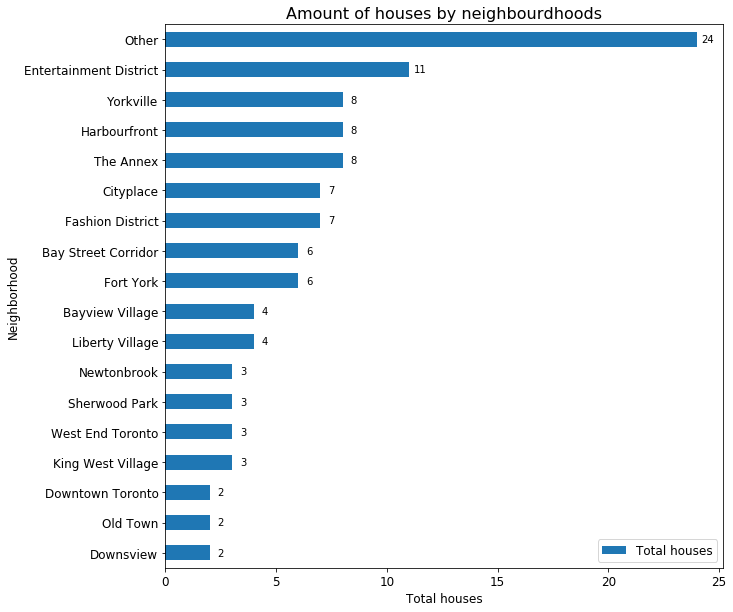

In [299]:



barh_group_size(sorted_values,sorted_column = 'Total houses',x='neighborhood',y='Total houses',y_label=('Neighborhood',12),ticks_font_size=12,x_label=('Total houses',12),title =('Amount of houses by neighbourdhoods',16))

In [300]:
neighbourdhood = np.round(house_data.groupby(['neighborhood']).price_100K.mean(),2).to_frame()
neighbourdhood.reset_index(inplace = True)
sorted_values = neighbourdhood.sort_values(by =['price_100K'],ascending = False)
sorted_values 

,neighborhood,price_100K
13,Other,15.95
17,Yorkville,14.65
3,Downsview,13.48
15,The Annex,13.09
0,Bay Street Corridor,10.39
6,Fashion District,10.35
8,Harbourfront,10.11
4,Downtown Toronto,9.12
12,Old Town,7.74
7,Fort York,7.71


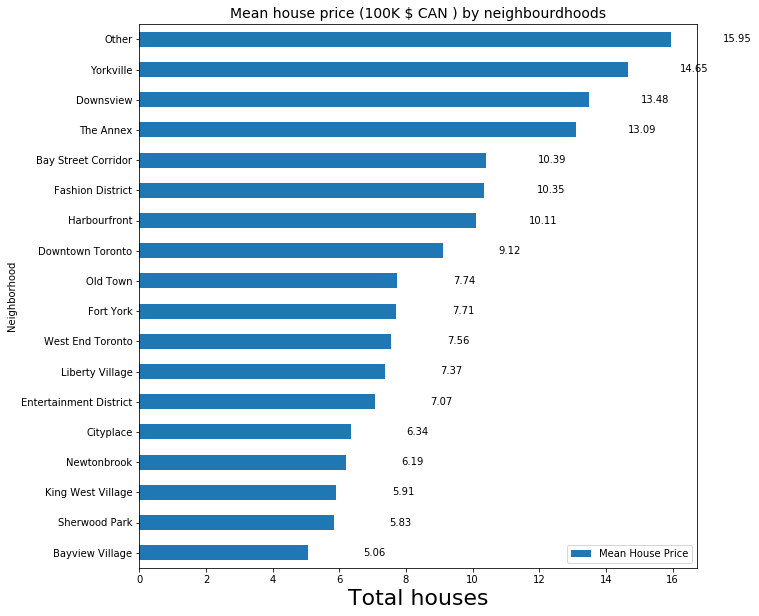

In [301]:
# Mean house price (100K $ CAN ) by neighbourdhoods
sorted_values.rename(columns ={'price_100K':'Mean House Price'},inplace= True)
sorted_values = sorted_values.sort_values(by =['Mean House Price'])
ax =sorted_values.plot(kind='barh',x='neighborhood',y='Mean House Price',figsize=(10,10))
plt.ylabel('Neighborhood', fontsize=10)
plt.yticks(fontsize =10)
plt.xticks(fontsize =10)
plt.legend(fontsize =10)
plt.xlabel('Total houses', fontsize=22)
plt.title('Mean house price (100K $ CAN ) by neighbourdhoods',fontsize=14)
rects = ax.patches
for rect,label in zip(rects,sorted_values['Mean House Price'].values):
    ax.text(rect.get_width()+2,(rect.get_y()+rect.get_height()-0.25),label,ha ='center',va ='center',fontsize =10)

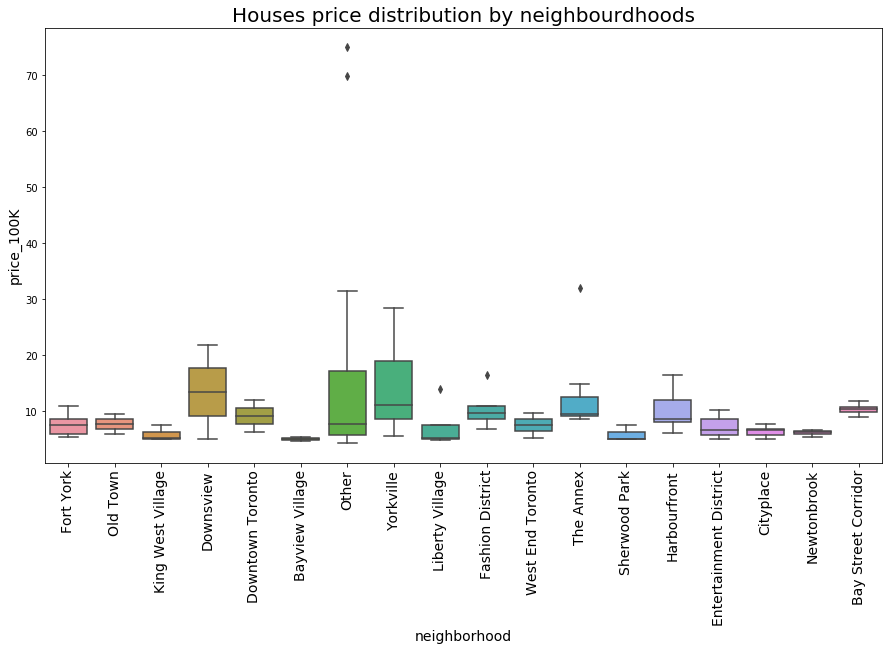

In [302]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
data_filtered = house_data
plt.ylabel('Neigborhoods',fontsize =14)
plt.yticks(fontsize =10)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by neighbourdhoods',fontsize=20)
sns.boxplot(data =data_filtered,x ='neighborhood',y='price_100K',ax =ax)
for label in ax.get_xticklabels():
        label.set_rotation(90)


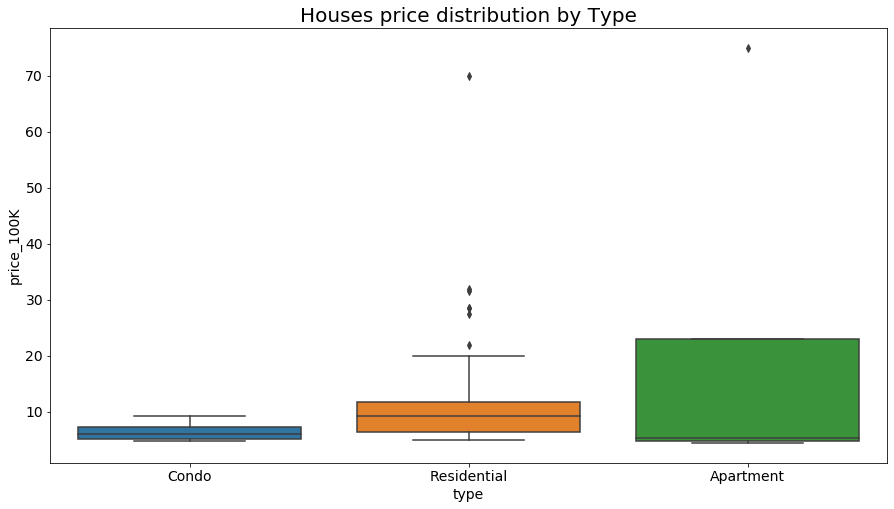

In [303]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
data_filtered = house_data
plt.ylabel('Neigborhoods',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by Type',fontsize=20)
sns.boxplot(data =data_filtered,x ='type',y='price_100K',ax =ax)

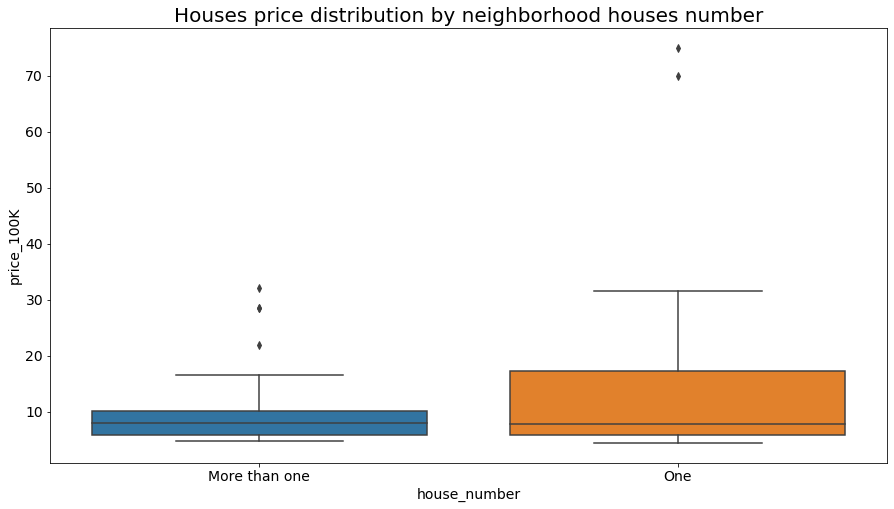

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
data_filtered = house_data
plt.ylabel('Neigborhoods',fontsize =14)
plt.yticks(fontsize =14)
plt.xticks(fontsize =14)
plt.xlabel('Houses price', fontsize=14)
plt.title('Houses price distribution by neighborhood houses number',fontsize=20)
sns.boxplot(data =data_filtered,x ='house_number',y='price_100K',ax =ax)

In [305]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(house_data['price_100K'], house_data['type'])
mc_results = mc.tukeyhsd()
print(mc_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Apartment       Condo -16.1486 0.0082 -28.7537 -3.5436   True
Apartment Residential -11.3174  0.065 -23.1821  0.5473  False
    Condo Residential   4.8312  0.101  -0.7159 10.3784  False
-------------------------------------------------------------


In [306]:
mc = MultiComparison(house_data['price_100K'], house_data['house_number'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
    group1    group2 meandiff p-adj lower   upper  reject
---------------------------------------------------------
More than one    One   6.8397 0.003 2.3771 11.3024   True
---------------------------------------------------------


In [307]:
## 3.1 Exploratory Data Analysis  for house_data dataset

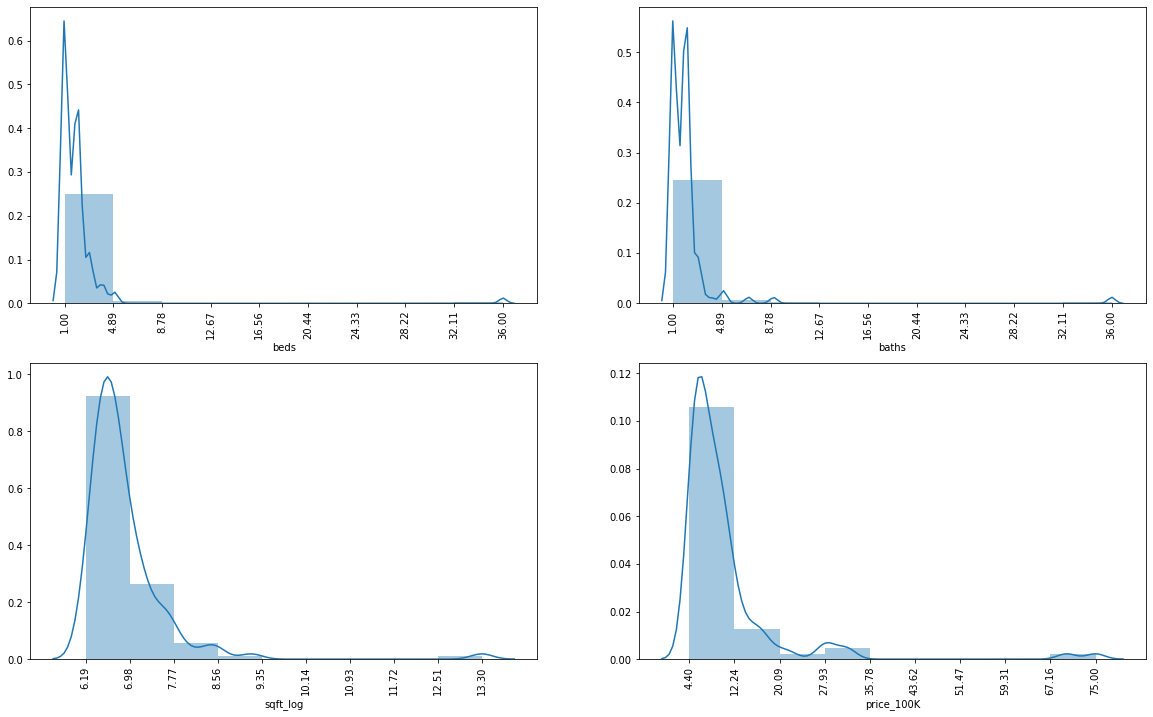

In [308]:
numerical = ['beds','baths','sqft_log','price_100K']
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
for variable, subplot in zip(numerical, ax.flatten()):
    new_bins = np.linspace(house_data[variable].min(),house_data[variable].max(),10)
    subplot.set_xticks(new_bins)
    sns.distplot(house_data[variable], ax=subplot,bins=new_bins,kde=True)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

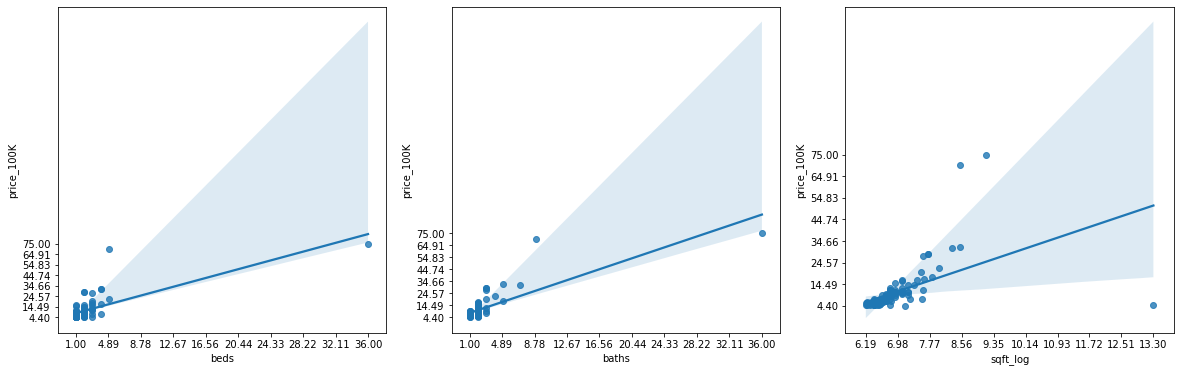

In [309]:
numerical = ['beds','baths','sqft_log']
fig, ax = plt.subplots(1,3,figsize=(20, 6))
for variable, subplot in zip(numerical, ax.flatten()):
    new_xbins = np.linspace(house_data[variable].min(),house_data[variable].max(),10)
    new_ybins = np.linspace(house_data['price_100K'].min(),house_data['price_100K'].max(),8)
    subplot.set_xticks(new_xbins)
    subplot.set_yticks(new_ybins)
    sns.regplot(x =variable,y='price_100K',data =house_data,ax=subplot)
    subplot.set(xlabel=variable,ylabel="price_100K")

In [310]:
data_filtered = house_data.corr()
data_filtered

,long,lat,price_100K,beds,baths,sqft,sqft_log,Apartment,Condo,Residential,More than one,One
long,1.000000,0.220615,-0.221969,-0.119029,-0.169032,0.003247,-0.081006,0.122898,0.066336,-0.116524,-0.061382,0.061382
lat,0.220615,1.000000,-0.055035,-0.000614,-0.033131,-0.056073,-0.015472,0.186189,0.376674,-0.436485,-0.314708,0.314708
price_100K,-0.221969,-0.055035,1.000000,0.725195,0.802937,-0.034868,0.509192,0.227660,-0.211211,0.098618,-0.279373,0.279373
beds,-0.119029,-0.000614,0.725195,1.000000,0.975204,-0.012713,0.367128,0.473224,-0.064539,-0.147506,-0.275868,0.275868
baths,-0.169032,-0.033131,0.802937,0.975204,1.000000,-0.013894,0.400264,0.444130,-0.071037,-0.128586,-0.274356,0.274356
sqft,0.003247,-0.056073,-0.034868,-0.012713,-0.013894,1.000000,0.766925,-0.012011,-0.051052,0.053339,0.043687,-0.043687
sqft_log,-0.081006,-0.015472,0.509192,0.367128,0.400264,0.766925,1.000000,0.091647,-0.217276,0.164182,-0.177298,0.177298
Apartment,0.122898,0.186189,0.227660,0.473224,0.444130,-0.012011,0.091647,1.000000,-0.096129,-0.349592,-0.250704,0.250704
Condo,0.066336,0.376674,-0.211211,-0.064539,-0.071037,-0.051052,-0.217276,-0.096129,1.000000,-0.898957,-0.013353,0.013353
Residential,-0.116524,-0.436485,0.098618,-0.147506,-0.128586,0.053339,0.164182,-0.349592,-0.898957,1.000000,0.122897,-0.122897


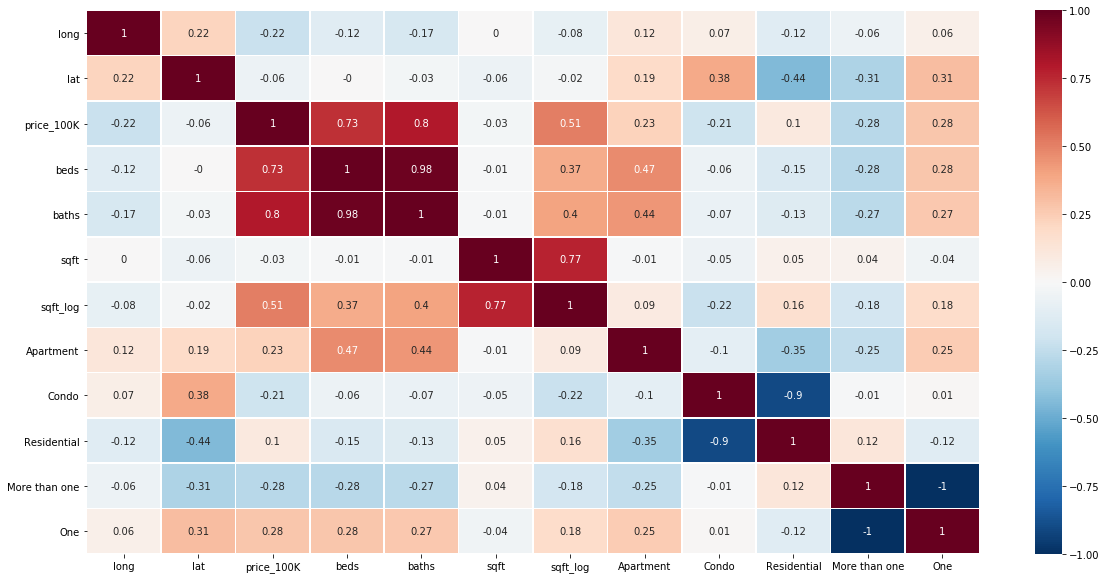

In [311]:
plt.figure(figsize = (20,10))
sns.heatmap(np.round(data_filtered,2),annot =True, linewidth = 0.6,cmap ='RdBu_r')
plt.show()

## 3.1 Exploratory Data Analysis  for mci_2014_2018 dataset

In [312]:
mci_2014_2018.head(3)

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,neighborhood,Lat,Long,ObjectId,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,2014,June,20,171,Friday,13,2014.0,6.0,20.0,171.0,Friday,10,Theft Over,D52,76,Bay Street Corridor,43.659229,-79.385193,2001,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,7.0,2.0,183.0,Wednesday,0,Assault,D32,36,Newtonbrook West,43.777592,-79.425400,2002,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,7.0,2.0,183.0,Wednesday,0,Robbery,D32,36,Newtonbrook West,43.777592,-79.425400,2003,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [313]:
df_pivot = mci_2014_2018[mci_2014_2018['occurrenceyear'] >= 2014.0].pivot_table(index ='occurrencemonth',columns ='occurrenceyear',values='MCI', aggfunc='count')



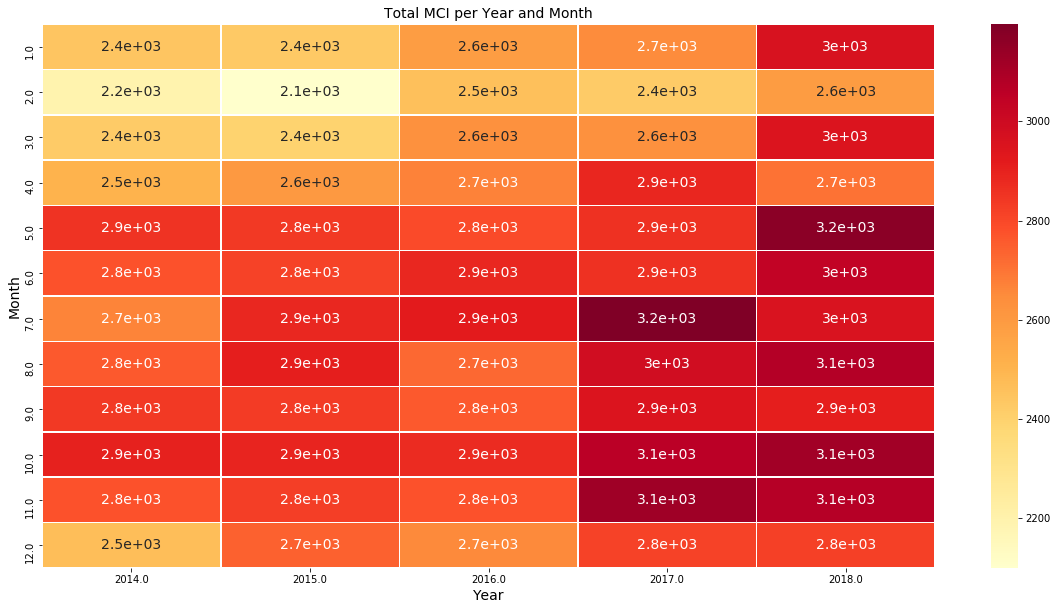

In [314]:
plt.figure(figsize = (20,10))
plt.title('Total MCI per Year and Month',fontsize=14)
sns.heatmap(df_pivot,annot =True, linewidth = 0.6,cmap ='YlOrRd', annot_kws ={'size':14})
plt.xlabel('Year',fontsize=14)
plt.ylabel('Month',fontsize=14)
plt.show()

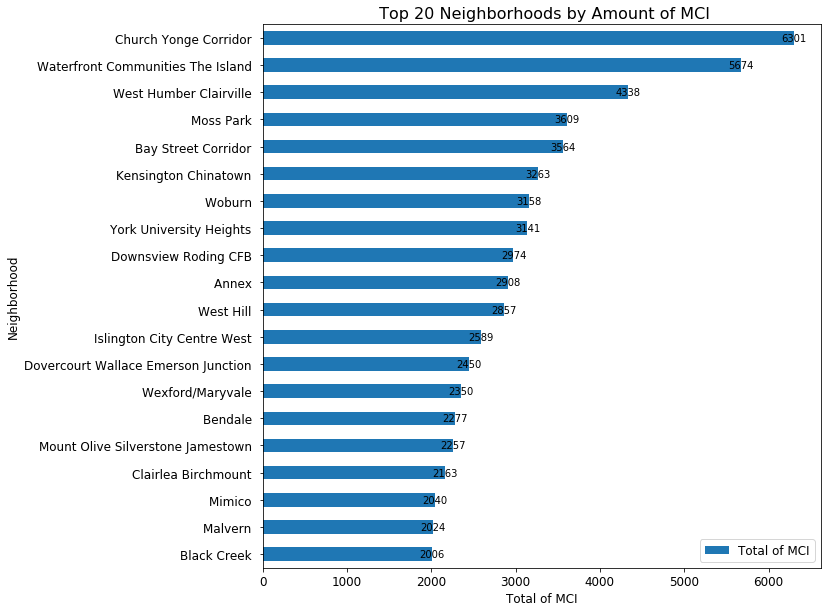

In [315]:
# function to compute group size of columns in dataset
sorted_values = groupby_size(dataset=mci_2014_2018,columns =['neighborhood'],name_of_size ='Total of MCI',ascending = False)
sorted_values = sorted_values.head(20)
neighbordhood_list = sorted_values.neighborhood.values
barh_group_size(sorted_values,sorted_column = 'Total of MCI',x='neighborhood',y='Total of MCI',y_label=('Neighborhood',12),ticks_font_size=12,x_label=('Total of MCI',12),title =(' Top 20 Neighborhoods by Amount of MCI',16))

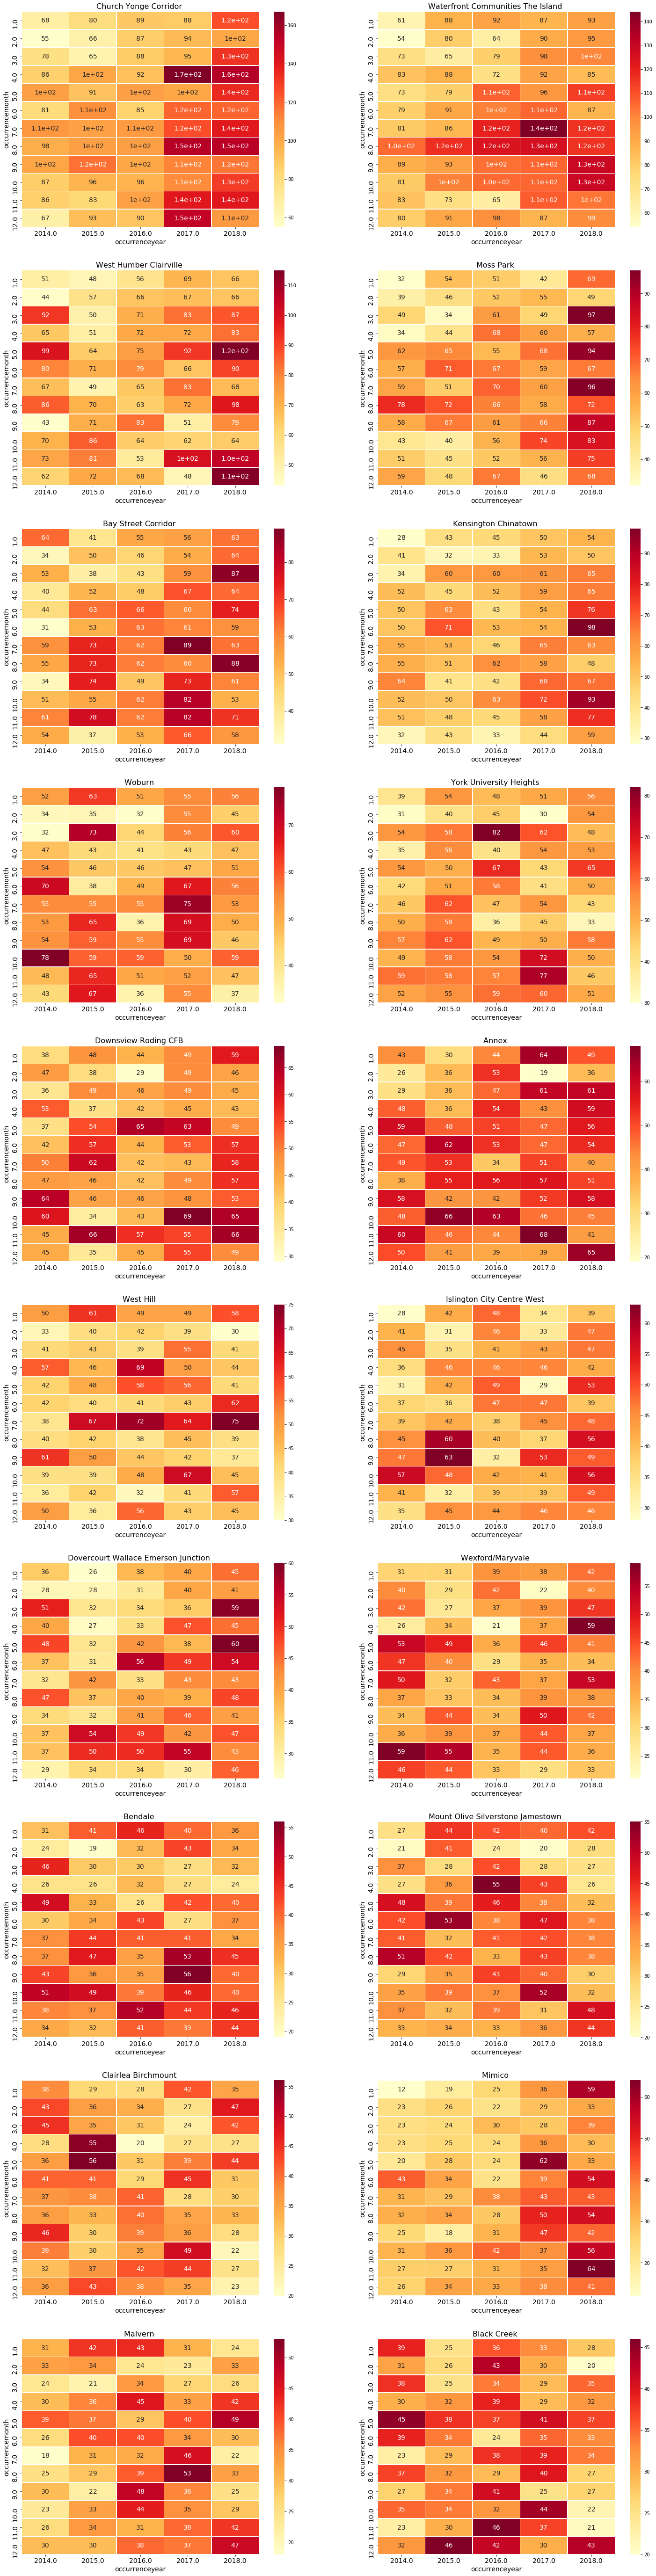

In [316]:
neighbordhoods = neighbordhood_list
fig, ax = plt.subplots(len(neighbordhoods)//2,2, figsize=(25, 100))
for variable, subplot in zip(neighbordhoods, ax.flatten()):
    data = mci_2014_2018[(mci_2014_2018['neighborhood'] ==variable) &(mci_2014_2018['occurrenceyear']>=2014.0)].pivot_table(index ='occurrencemonth',columns ='occurrenceyear',values='MCI', aggfunc='count')
    subplot.set_title(variable,fontsize =16)
    subplot.set_xlabel('year',fontsize =14)
    subplot.set_ylabel('month',fontsize =14)
    sns.heatmap(data,annot =True, linewidth = 0.6,cmap ='YlOrRd', ax =subplot, annot_kws ={'size':14})
    for label in subplot.get_xticklabels():
        label.set_fontsize(14)
    for label in subplot.get_yticklabels():
        label.set_fontsize(14)
        

In [317]:
neig_group = mci_2014_2018[mci_2014_2018['occurrenceyear']>=2014.0].groupby(['neighborhood','reportedyear','occurrencemonth']).MCI.count().to_frame().reset_index()
neig_group = neig_group.groupby(['neighborhood','occurrencemonth']).MCI.mean().to_frame().reset_index()
neig_group = neig_group.groupby(['neighborhood']).MCI.mean().to_frame().reset_index()
neig_group

,neighborhood,MCI
0,Agincourt North,16.733333
1,Agincourt South Malvern West,21.916667
2,Alderwood,7.633333
3,Annex,48.250000
4,Banbury Don Mills,15.550000
5,Bathurst Manor,15.833333
6,Bay Street Corridor,59.200000
7,Bayview Village,13.166667
8,Bayview Woods Steeles,7.116667
9,Bedford Park Nortown,18.766667


In [318]:
house_data['neighborhood'] = house_data['neighborhood'].astype('str')
house_data['neig_index'] = house_data.neighborhood.str.replace(' ','')
house_data['neig_index'] = house_data['neig_index'].str.lower()
neig_group['neig_index'] =  neig_group.neighborhood.str.replace(' ','')
neig_group['neig_index'] = neig_group['neig_index'].str.lower()
house_data2 = pd.merge(house_data,neig_group,how ='inner',on = 'neig_index')

In [319]:
house_data2.rename(columns ={'neighborhood_x': 'neighborhood','MCI': 'Mean MCI per month'},inplace =True)
house_data2.drop(columns = ['neig_index','neighborhood_y'],inplace = True)
house_data2

,address,long,lat,price_100K,beds,baths,sqft,type,neighborhood,sqft_log,Apartment,Condo,Residential,house_number,More than one,One,Mean MCI per month
0,"19 Singer Crt, Toronto, Ontario",-79.369645,43.769466,4.86,1,1,540,Apartment,Bayview Village,6.29,1,0,0,More than one,1,0,13.166667
1,"2 Rean Drive, Toronto, Ontario",-79.383460,43.765724,4.68,1,1,638,Condo,Bayview Village,6.46,0,1,0,More than one,1,0,13.166667
2,"Leslie St, Toronto, Ontario",-79.363939,43.766842,5.20,1,1,535,Condo,Bayview Village,6.28,0,1,0,More than one,1,0,13.166667
3,"18 Rean Dr, Toronto, Ontario",-79.383178,43.766976,5.50,1,2,699,Residential,Bayview Village,6.55,0,0,1,More than one,1,0,13.166667
4,"1121 Bay St Toronto, Toronto, Ontario",-79.388446,43.668038,10.38,2,2,999,Residential,Bay Street Corridor,6.91,0,0,1,More than one,1,0,59.200000
5,"5 St Joseph St toronto, Toronto, Ontario",-79.385581,43.665786,11.80,2,2,999,Residential,Bay Street Corridor,6.91,0,0,1,More than one,1,0,59.200000
6,"711 Bay Street Toronto, Toronto, Ontario",-79.384742,43.658858,10.99,2,2,1399,Residential,Bay Street Corridor,7.24,0,0,1,More than one,1,0,59.200000
7,"37 Grosvenor St Toronto, Toronto, Ontario",-79.387116,43.664192,9.00,2,2,799,Residential,Bay Street Corridor,6.68,0,0,1,More than one,1,0,59.200000
8,"1121 Bay Street, Toronto, Ontario",-79.388446,43.668038,10.38,2,2,999,Residential,Bay Street Corridor,6.91,0,0,1,More than one,1,0,59.200000
9,"290 Adelaide St Toronto Ontario, Toronto, Ontario",-79.384900,43.652900,9.79,2,2,899,Residential,Bay Street Corridor,6.80,0,0,1,More than one,1,0,59.200000


# 4 Calculation of target variable and  Predictive Modeling

In [320]:
house_data_1 = house_data.drop(columns= ['long','lat'])

## 4.1 Calculation of target variable and  Predictive Modeling for house_data dataset

In [321]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor,ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from  sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [328]:
def predictive_model (dataset =house_data ,include_bias=False,poly_degree=2, alpha =1.0,random_state =49,learning_rate =0.05,test_size =0.15,target_variable ='price_100K',corr_rate_value = 0.15):
    model_dictionary = dict()
    data_filtered = dataset.corr()
    data_filtered.loc[np.abs(data_filtered.price_100K)>corr_rate_value,target_variable]
    features = data_filtered.loc[(np.abs(data_filtered[target_variable])>corr_rate_value) & (np.abs(data_filtered[target_variable]) <1.0),target_variable].index.values
    print(features)
    X = dataset[features]
    y = dataset['price_100K']
    X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)
    lr = LinearRegression()
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias)),('model',LinearRegression())]
    pipe1 = Pipeline(inputs)
    rm=Ridge(alpha=alpha)
    inputs=[('polynomial', PolynomialFeatures(include_bias=include_bias,degree =poly_degree)),('model',Ridge(alpha=alpha))]
    pipe2 = Pipeline(inputs)
    abr = AdaBoostRegressor(random_state =random_state,learning_rate =learning_rate)
    rfr = RandomForestRegressor(random_state =random_state)
    gbr = GradientBoostingRegressor(random_state =random_state,learning_rate =learning_rate)
    xtr = ExtraTreesRegressor(random_state =random_state)
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,max_depth = 5, alpha = 10, n_estimators = 10)
    br = BaggingRegressor(random_state =random_state)
    model_dictionary['model_name'] = ['LinearRegression','Ridge','Polynomial with Linear','Polynomial Ridge','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','ExtraTreesRegressor','xgboost','BaggingRegressor']
    model_dictionary['model'] = [lr,rm,pipe1,pipe2,rfr,abr,gbr,xtr,xg_reg,br]
    model_dictionary['r_score'] = []
    model_dictionary['mse'] = []
    model_dictionary['rmse']  = []
    model_dictionary['mae'] = []
    model_dictionary['mape'] = []
    model_dictionary['y_pred'] = []
    model_dictionary['y_test'] = []
    
    for model in model_dictionary['model']:
        model.fit(X_train,y_train)
        y_pred =model.predict(X_test)
        model_dictionary['y_pred'].append(y_pred)
        model_dictionary['y_test'].append(y_test)
        model_dictionary['r_score'].append(model.score(X_test,y_test))
        model_dictionary['mse'].append(mean_squared_error(list(y_pred),list(y_test)))
        model_dictionary['rmse'].append(np.sqrt(mean_squared_error(list(y_pred),list(y_test))))
        model_dictionary['mae'].append(mean_absolute_error(list(y_pred),list(y_test)))
        t = np.round((np.abs(list(y_pred) - y_test)/list(y_test))*100,2)
        value = np.round(np.mean(t),2)
        model_dictionary['mape'].append(value)
    model_df =pd.DataFrame(model_dictionary)
    model_df.set_index('model_name',inplace = True)
    return model_df[model_df.r_score > 0]

In [329]:
model = predictive_model(house_data,random_state =2)
model [['r_score','mse','rmse','mae','mape']]

['long' 'beds' 'baths' 'sqft_log' 'Apartment' 'Condo' 'More than one'
 'One']
[09:54:48] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


,r_score,mse,rmse,mae,mape
model_name,,,,,
RandomForestRegressor,0.907202,26.075667,5.106434,1.932160,10.53
AdaBoostRegressor,0.979425,5.781478,2.404470,1.362498,10.57
GradientBoostingRegressor,0.966229,9.489290,3.080469,1.619364,11.55
ExtraTreesRegressor,0.985377,4.109055,2.027080,1.186127,10.26
BaggingRegressor,0.750394,70.137326,8.374803,3.060451,12.98


In [330]:
model.to_csv('./dataset/metric_predictive.csv')

In [331]:
y_pred =model.loc['ExtraTreesRegressor','y_pred']
y_test = model.loc['ExtraTreesRegressor','y_test']
data =pd.DataFrame({'pred':y_pred,'test': y_test})
data['ape'] = np.round((np.abs(data.pred-data.test)/data.test)*100,2)
data

,pred,test,ape
356,6.356700,5.89,7.92
350,5.854200,5.20,12.58
383,5.808800,5.00,16.18
34,5.885200,5.00,17.70
456,6.243000,7.68,18.71
460,30.128900,31.99,5.82
425,67.671200,75.00,9.77
559,8.607500,9.00,4.36
401,7.600000,9.79,22.37
428,5.344300,6.00,10.93
